# Predicting heart disease using Machine Learning

This notebook looks at various ML and DS libraries to create a model which predicts whether someone has heart disease using medical attributes

THe approach:
1. The problem definition
2. Data
3. Evaluation
4. FEatures
5. MOdelling
6. Experiment

## 1. Problem Definition

Can we predict heart disease given data paramters
 
 
## 2. Data

From kaggle.
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


## 3. Evaluation

> If we can reach 95% accuracy during proof of concept, we'll pursue the project


## 4. Features

**data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
  0: Typical angina: chest pain related decrease blood supply to the heart
  1: Atypical angina: chest pain not related to heart
  2: Non-anginal pain: typically esophageal spasms (non heart related)
  3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
  anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
  above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
  0: Nothing to note
  1: ST-T Wave abnormality
     can range from mild symptoms to severe problems
     signals non-normal heart beat
  2: Possible or definite left ventricular hypertrophy
     Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
            looks at stress of heart during excercise
            unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
   0: Upsloping: better heart rate with excercise (uncommon)
   1: Flatsloping: minimal change (typical healthy heart)
   2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
       colored vessel means the doctor can see the blood passing through
       the more blood movement the better (no clots)
* thal - thalium stress result
   1,3: normal
   6: fixed defect: used to be defect but ok now
   7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [12]:
# Creating data dictiopnary 
data_dict ={'age': 'age in years',
            'sex': '1 = male; 0 = female', 
            'cp': 'chest pain type',
            'trestbps': 'resting blood pressure in mm Hg on admission to the hospital',
            'chol': 'serum cholestoral in mg/dl',
            'fbs': 'fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)',
            'restecg': 'resting electrocardiographic results', 
            'thalach': 'maximum heart rate achieved', 
            'exang': 'exercise induced angina (1 = yes; 0 = no)',
            'oldpeak': 'ST depression induced by exercise relative to rest',
            'slope': 'the slope of the peak exercise ST segment', 
            'ca': 'number of major vessels (0-3) colored by flourosopy',
            'thal': '1 = normal; 2 = fixed defect; 3 = reversable defect', 
            'target': '1 or 0'}


## Preparing the tools

In [2]:
# eda and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Read data

In [3]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Exploratory Data Analysis

The goal here is to find out more about the data and become a subject matter expert on dataset youre working with.

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different datatypes?
3. What is missing from the data and how to deal with them?
4. Where are the outliers and why care about them?
5. How can you add change or remove features to get the most of your data?

In [13]:
# Lets find out how many of each type ther are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

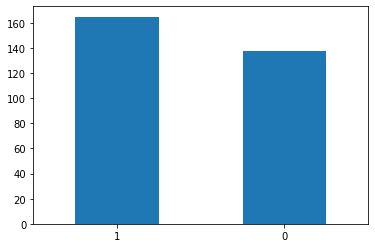

In [17]:
# Visualise it
df['target'].value_counts().plot(kind='bar', rot=0);  # rot rotates the xticks 

In [19]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [20]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart disease frequency acc to sex


In [21]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [22]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


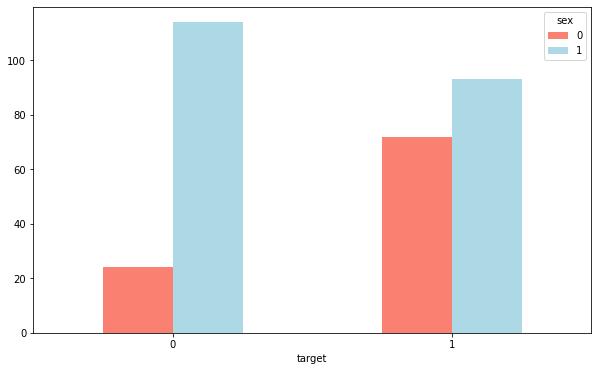

In [27]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', 
                                    figsize=(10,6), 
                                    rot=0, 
                                    color=['salmon', 'lightblue']);

### Age vs Max heart rate for heart disease

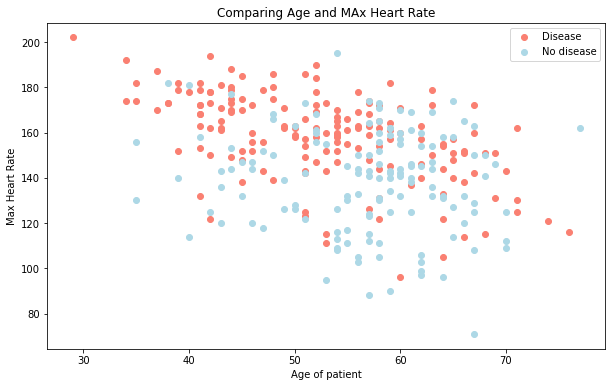

In [34]:
# Creating anoter figure
plt.figure(figsize=(10,6))

# Scatter with posotive example
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c='salmon');

# Scatter with negatibe example
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0],
            c='lightblue');

# Add some helpful info
plt.title('Comparing Age and MAx Heart Rate')
plt.xlabel('Age of patient')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No disease'])

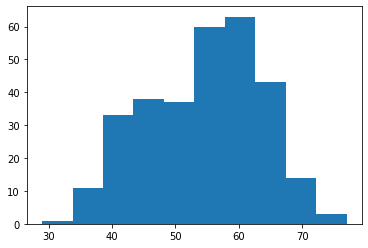

In [36]:
# CHeck distitbution of age column with histogram
plt.hist(df.age);

Its kinda like a normal distribution. The point is, we can look at the datapoints based on what they are and decide whether certain sample points should really be included in the analysis. eg. we prolly dont want an age=150 as no one has lived that long

### Heart disease frequency per chest pain type
 cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease

In [38]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


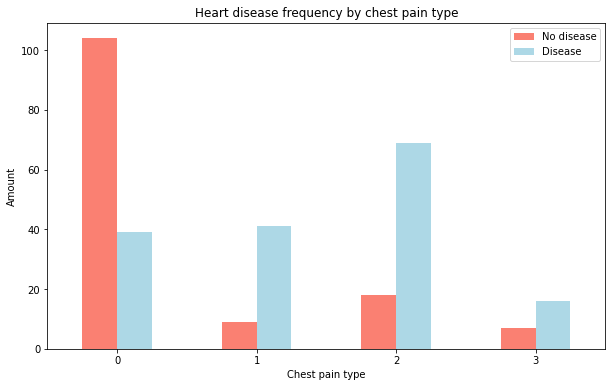

In [39]:
# Visualise
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'], rot=0)

# Add details
plt.title('Heart disease frequency by chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease']);


In [4]:
# Make a correlation of matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


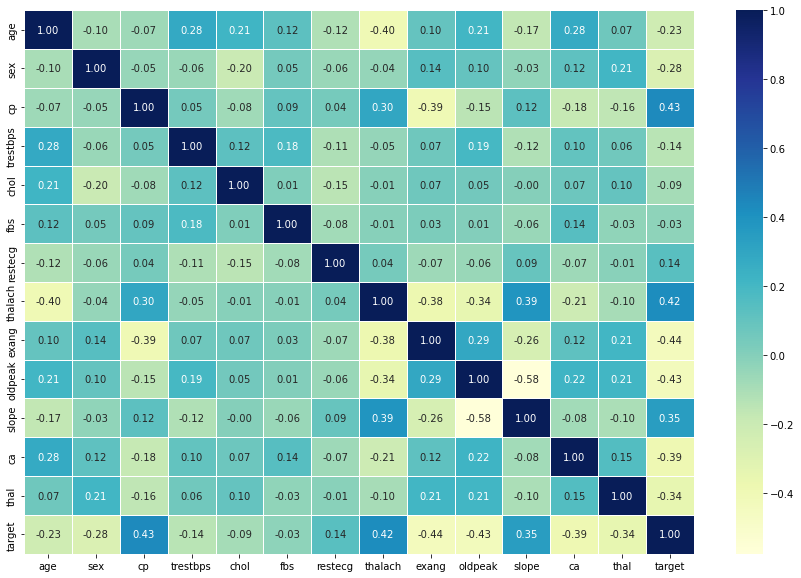

In [8]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

## 5. MOdelling

In [10]:
# Split into X and y
X = df.drop('target', axis=1)
y = df['target']

# Creating random seed 
np.random.seed(3)

# SPlitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [12]:
aa= {'a':1, 'b':2, 'c':3}
aa.update()

NOw we've got our data split, Its time to build a machine learning model

We'll train the model(find patterns) on the training set

We'll test the model(use patterns) on the test set

We're goin to try three different models: 

1. Logistic Regression
2. K Neighbours CLassifier
3. Ensemble Classifier

In [19]:
# MAke a dict()
models = {'Random Forest Classifier': RandomForestClassifier(),
          'KNN': KNeighborsClassifier(),
          'Logistic Regression': LogisticRegression(max_iter=1000)}  # increase max_iter to 100 to prevent ConvergenceWarning

# Make a function to fit and train 
def fit_and_train(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates various machine learning models
    models: dict of sklearn machine learning models
    X_train, y_train: Training data and labels
    X_test, y_test: Testing data and labels
    """
    # Set random seed
    np.random.seed(3)

    # Dict for model scores
    model_score = {}

    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        clf = model
        # Evaluate the model and append the score to model_score
        clf.fit(X_train, y_train)
        model_score[name] = clf.score(X_test, y_test)
    
    return model_score

model_scores = fit_and_train(models, X_train, X_test, y_train, y_test)
model_scores

{'Random Forest Classifier': 0.8360655737704918,
 'KNN': 0.6557377049180327,
 'Logistic Regression': 0.8852459016393442}

### Model Comparison

<AxesSubplot:>

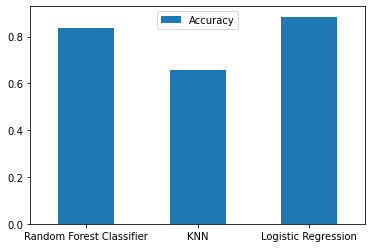

In [38]:
model_comparison = pd.DataFrame(model_scores, index=['Accuracy'])
model_comparison.T.plot.bar(rot=0)

In [39]:
model_comparison.T

,Accuracy
Random Forest Classifier,0.836066
KNN,0.655738
Logistic Regression,0.885246


Now we've got a baseline model... and we know a model's first predictions aren't what we should base of next steps off. What should we do?

Let's look at the following:
1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross validation
5. Precision
6. Recall
7. F1 Score
8. CLassification Report
9. ROC Curve
10. Area under the curve

### Hyperparameter tuning

In [85]:
# Lets tune KNN
train_scores = []
test_scores = []

# Create a list of different values  for n_neighbours
neighbours = range(1,21)

# set up KNN instance
knn = KNeighborsClassifier()

# Loop through
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # append to train_Scores
    train_scores.append(knn.score(X_train, y_train))
    
    # append to test_scores
    test_scores.append(knn.score(X_test, y_test))
    
    

In [86]:
train_scores

[1.0,
 0.8140495867768595,
 0.7892561983471075,
 0.7479338842975206,
 0.7727272727272727,
 0.7520661157024794,
 0.731404958677686,
 0.7355371900826446,
 0.7355371900826446,
 0.731404958677686,
 0.7231404958677686,
 0.6900826446280992,
 0.7107438016528925,
 0.6983471074380165,
 0.6983471074380165,
 0.6776859504132231,
 0.6900826446280992,
 0.6859504132231405,
 0.6859504132231405,
 0.6942148760330579]

In [87]:
test_scores

[0.5573770491803278,
 0.5081967213114754,
 0.6065573770491803,
 0.5573770491803278,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.5901639344262295,
 0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.5573770491803278]

Most accurate test score is 67.21%


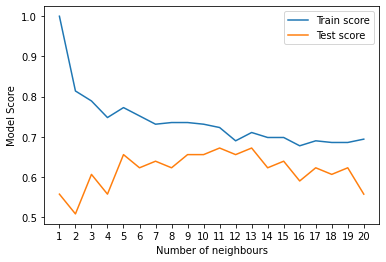

In [88]:
# Visualise them
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbours')
plt.ylabel('Model Score')
plt.legend()
plt.AutoLocator()
print(f'Most accurate test score is {max(test_scores)*100:.2f}%')




In [84]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6721311475409836

This was the manual search for different hyperparameters. Next we'll look into RandomizedSearchCV

### Hyperparamter Tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [69]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

rf_grid = {'n_estimators': np.arange(10,1000,50),
                 'max_depth': [None,3,5,10],
                 'min_samples_split': np.arange(2,20,2),
                 'min_samples_leaf': np.arange(1,20,2)}

NOw we got hyperparamter grids set up for each of our model, lets tune them using RandomizedSearchCV

In [61]:
# Tune LogisticRegression
np.random.seed(3)

# Set up hyperparameter search for LOgisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search for LogisticRegression
rs_log_reg.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [63]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [64]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

We've tuned LogReg model so lets do it for RandomForest...

In [89]:
# Setup random seed
np.random.seed(3)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf =RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          n_iter=20,
                          cv=5,
                          verbose=True)

# Fit random hyperparameter search for RandomForestClassifier
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [90]:
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': 10}

In [91]:
# Lets score
rs_rf.score(X_test, y_test)

0.8360655737704918

### Hyper parameter tuning with GridSearchCV

Lets tune hyperparamters of our LogisticRegression model using GridSearchCV, since it gave the best score


In [92]:
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ['liblinear']}

In [94]:
# Set up random seed
np.random.seed(3)

# Tuning hyperparameters using gridsearchcv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fitting the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [95]:
gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [98]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluating our tuned classification model beyond accuracy:
1. ROC Curve and AUC Score
2. Classification Report
3. Confusion Matrix
4. Precision
5. Recall
6. F1 Score

... and it would be great if cross validation was used wherever possible

TO make comparisons and evaluate our trained model, first we need to make predictions

In [131]:
# Make predictions with our tuned model
y_preds = gs_log_reg.predict(X_test)

In [132]:
y_preds

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [133]:
y_test

245    0
162    1
10     1
161    1
73     1
      ..
102    1
83     1
259    0
121    1
61     1
Name: target, Length: 61, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


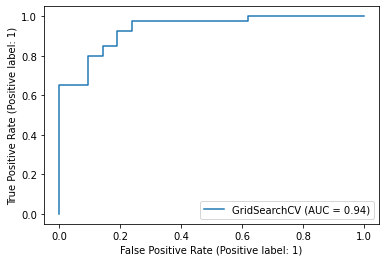

In [137]:
# IMport the metrics for evaluations
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# PLot roc curve
plot_roc_curve(gs_log_reg, X_test, y_test);

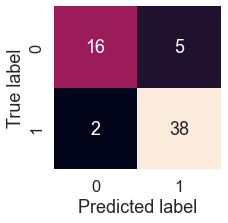

In [140]:
# Confusion MAtrix using seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking map using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

plot_conf_mat(y_test, y_preds)

Lets get classification report as well as cross validated precision, recall and f1 score

In [141]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.88      0.95      0.92        40

    accuracy                           0.89        61
   macro avg       0.89      0.86      0.87        61
weighted avg       0.89      0.89      0.88        61



### Calculate evaluation metrics using cross validation

We are going to calculate precision, recall and f1 scores using cross validation and to do so we'll be using cross validation via `cross_val_score()`

In [142]:
# Check best hyperparameters
gs_log_reg.best_params_


{'C': 117.21022975334793, 'solver': 'liblinear'}

In [143]:
# Create new classifier with best params
clf = LogisticRegression(C=117.21022975334793, solver='liblinear')

In [148]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                         X, 
                         y,
                         cv=5, 
                         scoring='accuracy')

cv_acc

array([0.80327869, 0.8852459 , 0.83606557, 0.86666667, 0.76666667])

In [149]:
cv_acc = np.mean(cv_acc)
cv_acc

0.831584699453552

In [150]:
# Cross validated precision
cv_precision = cross_val_score(clf, 
                               X,
                               y,
                               cv=5,
                               scoring='precision')

cv_precision

array([0.78378378, 0.90625   , 0.84848485, 0.83783784, 0.74358974])

In [151]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8239892427392427

In [153]:
# Croaa validated recall
cv_recall = cross_val_score(clf, 
                            X,
                            y,
                            cv=5,
                            scoring='recall')

cv_recall

array([0.87878788, 0.87878788, 0.84848485, 0.93939394, 0.87878788])

In [154]:
cv_recall = np.mean(cv_recall)
cv_recall

0.8848484848484848

In [156]:
# Cross validated f1 score
cv_f1 = cross_val_score(clf, 
                        X,
                        y,
                        cv=5,
                        scoring='f1')

cv_f1

array([0.82857143, 0.89230769, 0.84848485, 0.88571429, 0.80555556])

In [157]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8521267621267622

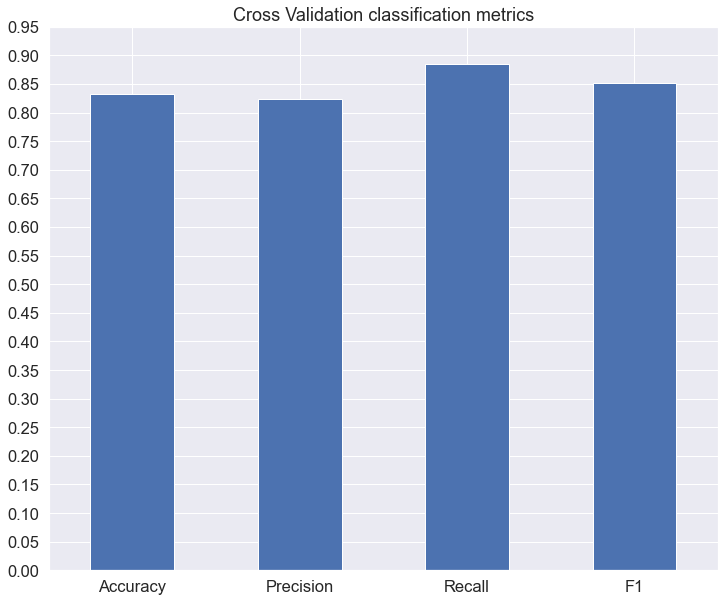

In [167]:
# Visualise cross validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                            'Precision': cv_precision,
                            'Recall': cv_recall,
                            'F1': cv_f1},
                          index=[0])
cv_metrics.T.plot(kind='bar', 
                  title='Cross Validation classification metrics',
                  legend=False,
                  rot=0,
                  figsize=(12,10),
                  yticks=np.arange(0,1,0.05));

### Feature Importance
Feature Importance of asking, "which feature contributed most to outcomes of the model and how did they contribute?"

Finding feature importance is different for different models. One way is to search for "[MODEL NAME] feature importance".

Lets find the feature importance for our logistic regression model.

In [168]:
# Fit an instance of LogReg
gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [169]:
clf = LogisticRegression(C=117.21022975334793,
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=117.21022975334793, solver='liblinear')

In [170]:
# Check coef_
clf.coef_

array([[-0.01233941, -1.76083968,  0.80186548, -0.01957033, -0.00424713,
         0.31511646,  0.38781825,  0.0256183 , -0.88939747, -0.52517354,
         0.56264443, -0.62796121, -0.86638709]])

In [171]:
# MAtch coefs of features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': -0.012339413983886532,
 'sex': -1.760839677817711,
 'cp': 0.8018654767955357,
 'trestbps': -0.01957032557988432,
 'chol': -0.004247128802549275,
 'fbs': 0.3151164574242431,
 'restecg': 0.38781824773778073,
 'thalach': 0.025618296842843606,
 'exang': -0.8893974690882805,
 'oldpeak': -0.5251735416536594,
 'slope': 0.5626444275348289,
 'ca': -0.6279612107211974,
 'thal': -0.8663870858284227}

<AxesSubplot:title={'center':'Feature Importance'}>

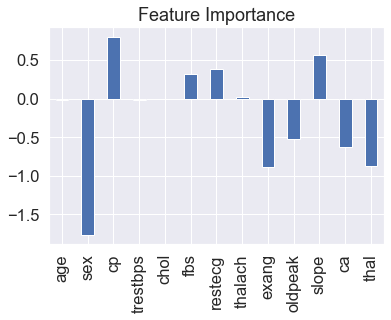

In [173]:
# Visualise it
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot(kind='bar',
                   legend=False,
                   title='Feature Importance')

In [175]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [176]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment:

0. Upsloping: better heart rate with excercise (uncommon) 
1. Flatsloping: minimal change (typical healthy heart) 
2. Downslopins: signs of unhealthy heart

It makes sense that upsloping has a smaller fraction of positives for heart disease and that downsloping means more instances of heart disease

 # 6. Experimentation
 
 If you havent hit your evaluation metric yet, ask yourself...
 
 * Could you collect more data?
 * COuld you try a better model? Like CatBoost or XGBoost?
 * COuld you improve current model?
 * If your model is good enough (youve hit your evaluation metric), how could you export and share it with others?